In [1]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# extra packages for interactive plots
import holoviews as hv
import panel as pn
pn.extension('mathjax')

## Graphical analysis of negative autoregulation:

$$\frac{dX}{dt} = \frac{\beta K^n}{K^n+X^n} - \alpha X \tag{1} $$

In [2]:
# initialize our sliders
beta_slider = pn.widgets.FloatSlider(name="beta", start=5, end=10, step=0.5, value=10)
gamma_slider = pn.widgets.FloatSlider(name="gamma", start=0.1, end=5, step=0.1, value=1)
K_slider = pn.widgets.FloatSlider(name="K", start=1, end=10, step=0.5, value=5)
n_slider = pn.widgets.FloatSlider(name="n", start=1, end=10, step=1, value=2)


# plotting function for breaking out the production and degredation pieces
@pn.depends(beta_slider.param.value, gamma_slider.param.value, K_slider.param.value, n_slider.param.value)
def prod_vs_deg(beta, gamma, K, n):
    
    # x and y values to plot
    x = np.linspace(0, 10, 200)
    production = beta * (K**n)/(K**n + x**n) 
    degradation = x  * gamma
    
    # specify the list of plots we want
    list_of_curves = [
    hv.Curve(data=(x, production), kdims=["x"], vdims=["dx/dt"], label="production").opts(color="black"),
    hv.Curve(data=(x, degradation), kdims=["x"], vdims=["dx/dt"], label="degradation").opts(color="red")
    ]
    
    # overlay all the plots, fix ylim so it doesn't change with the sliders
    return hv.Overlay(list_of_curves).opts(ylim=(0,10), show_grid=True, width=400, height=300, legend_position='bottom_right')


# plotting function for just dx/dt in it's entirety 
@pn.depends(beta_slider.param.value, gamma_slider.param.value, K_slider.param.value, n_slider.param.value)
def dx_dt(beta, gamma, K, n):
    
    # x and y values to plot
    x = np.linspace(0, 10, 200)
    dx_dt = beta * (K**n)/(K**n + x**n)  - x*gamma
    
    # specify the list of plots we want
    list_of_curves = [
    hv.Curve(data=(x, dx_dt), kdims=["x"], vdims=["dx/dt"], label="dx/dt").opts(color="black"),
    hv.Curve(data=(x, np.zeros(len(x))), kdims=["x"], vdims=["dx/dt"], label="y=0").opts(color="gray")
    ]
    
    # overlay all the plots, fix ylim so it doesn't change with the sliders
    return hv.Overlay(list_of_curves).opts(ylim=(-2,5), show_grid=True, width=400, height=300)


# layout the sliders and the plots
plots = pn.Row(prod_vs_deg, dx_dt)
sliders = pn.Column(beta_slider, gamma_slider, K_slider, n_slider)
pn.Column(sliders, plots)

Column
    [0] Column
        [0] FloatSlider(end=10, name='beta', start=5, step=0.5, value=10)
        [1] FloatSlider(end=5, name='gamma', start=0.1, value=1)
        [2] FloatSlider(end=10, name='K', start=1, step=0.5, value=5)
        [3] FloatSlider(end=10, name='n', start=1, step=1, value=2)
    [1] Row
        [0] ParamFunction(function)
        [1] ParamFunction(function)

## Graphical analysis of positive autoregulation:

$$\frac{dX}{dt} = \frac{\beta X^n}{K^n+X^n} - \alpha X \tag{1} $$

In [3]:
# initialize our sliders
beta_slider = pn.widgets.FloatSlider(name="beta", start=5, end=10, step=0.5, value=10)
gamma_slider = pn.widgets.FloatSlider(name="gamma", start=0.1, end=5, step=0.1, value=1)
K_slider = pn.widgets.FloatSlider(name="K", start=1, end=10, step=0.5, value=4)
n_slider = pn.widgets.FloatSlider(name="n", start=1, end=10, step=1, value=2)


# plotting function for breaking out the production and degredation pieces
@pn.depends(beta_slider.param.value, gamma_slider.param.value, K_slider.param.value, n_slider.param.value)
def prod_vs_deg(beta, gamma, K, n):
    
    # x and y values to plot
    x = np.linspace(0, 10, 200)
    production = beta * (x**n)/(K**n + x**n) 
    degradation = x  * gamma
    
    # specify the list of plots we want
    list_of_curves = [
    hv.Curve(data=(x, production), kdims=["x"], vdims=["dx/dt"], label="production").opts(color="black"),
    hv.Curve(data=(x, degradation), kdims=["x"], vdims=["dx/dt"], label="degradation").opts(color="red")
    ]
    
    # overlay all the plots, fix ylim so it doesn't change with the sliders
    return hv.Overlay(list_of_curves).opts(ylim=(0,10), show_grid=True, width=400, height=300, legend_position='bottom_right')


# plotting function for just dx/dt in it's entirety 
@pn.depends(beta_slider.param.value, gamma_slider.param.value, K_slider.param.value, n_slider.param.value)
def dx_dt(beta, gamma, K, n):
    
    # x and y values to plot
    x = np.linspace(0, 10, 200)
    dx_dt = beta * (x**n)/(K**n + x**n)  - x*gamma
    
    # specify the list of plots we want
    list_of_curves = [
    hv.Curve(data=(x, dx_dt), kdims=["x"], vdims=["dx/dt"], label="dx/dt").opts(color="black"),
    hv.Curve(data=(x, np.zeros(len(x))), kdims=["x"], vdims=["dx/dt"], label="y=0").opts(color="gray")
    ]
    
    # overlay all the plots, fix ylim so it doesn't change with the sliders
    return hv.Overlay(list_of_curves).opts(ylim=(-2,5), show_grid=True, width=400, height=300)


# layout the sliders and the plots
plots = pn.Row(prod_vs_deg, dx_dt)
sliders = pn.Column(beta_slider, gamma_slider, K_slider, n_slider)
pn.Column(sliders, plots)

Column
    [0] Column
        [0] FloatSlider(end=10, name='beta', start=5, step=0.5, value=10)
        [1] FloatSlider(end=5, name='gamma', start=0.1, value=1)
        [2] FloatSlider(end=10, name='K', start=1, step=0.5, value=4)
        [3] FloatSlider(end=10, name='n', start=1, step=1, value=2)
    [1] Row
        [0] ParamFunction(function)
        [1] ParamFunction(function)

1. Find steady state of interest
2. Create the jacobian
3. Find eigenvalues
4. Evaluate sign of real component

Stable: real negative
unstabe: real positive
saddle: real of differetn sign

stable spiral complex with negative real
unstable spiral complex with positive


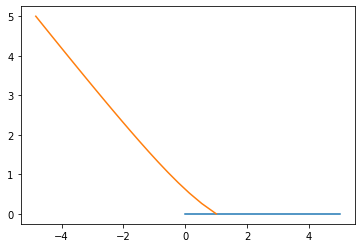

In [5]:
x = np.linspace(0,5,20)
y = np.linspace(0,5,20)
dx = 1/(1+y) - x
dy = x - y

plt.plot(x,dy)
plt.plot(dx,y)
